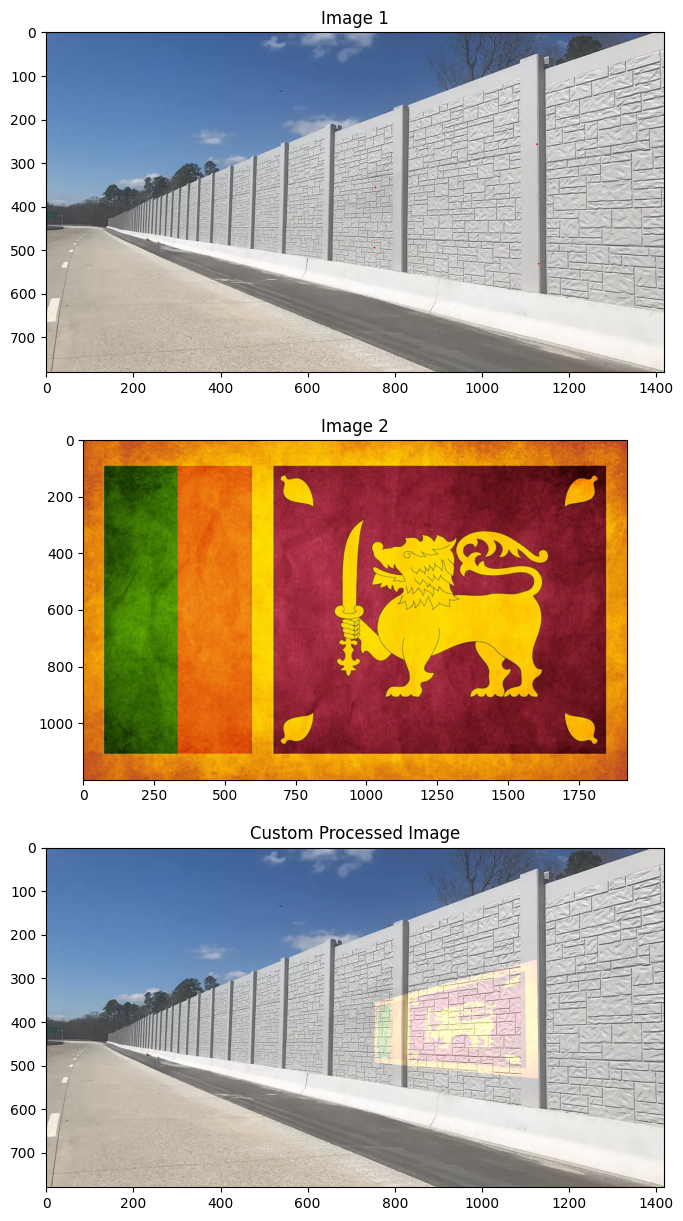

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt




# Loading the images for the process
IMG_01 = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\LECTURES\coding\A02\Assignment 02\Smith-Midland-sound-wall-IMG_2923.webp")
IMG_01 = cv.resize(IMG_01, (0, 0), fx=1, fy=1)
IMG_02 = cv.imread(r"C:\Users\Nipun Pushpakumara\Desktop\LECTURES\coding\A02\Assignment 02\Srl Lankan Flag.webp")

IMG_01 = IMG_01.astype(np.float64) / np.iinfo(IMG_01.dtype).max#converting the image to float64
IMG_02 = IMG_02.astype(np.float64) / np.iinfo(IMG_02.dtype).max#converting the image to float64

BACKGROUND_IMG = np.copy(IMG_01) #copying the image to a new variable

CORDINATES = [] #creating a list to store the cordinates
COUT = 0#initializing the count to 0

#Defined a fuction to take the corners of the image
def CLICKS(event, x, y, flags, params):
    global CORDINATES
    global COUT
    global BACKGROUND_IMG

    if event == cv.EVENT_LBUTTONDOWN:
        CORDINATES.append([x, y])
        COUT += 1

        BACKGROUND_IMG = cv.circle(BACKGROUND_IMG, (x, y), 2, (0, 0, 1), -1)
        cv.imshow("Custom Image", BACKGROUND_IMG)        
    
    if COUT == 4:#if the user click 4 points then the image will be closed
        cv.destroyAllWindows()
        cv.waitKey(1)

cv.imshow("Custom Image", IMG_01)
cv.setMouseCallback("Custom Image", CLICKS)
cv.waitKey(0)
cv.destroyAllWindows()

# Defining the cordinates of the image
X = np.array([[0, 0, 1], [IMG_02.shape[1], 0, 1], [IMG_02.shape[1], IMG_02.shape[0], 1], [0, IMG_02.shape[0], 1]]).T
Y = np.array([[CORDINATES[0][0], CORDINATES[0][1], 1], [CORDINATES[1][0], CORDINATES[1][1], 1], [CORDINATES[2][0], CORDINATES[2][1], 1], [CORDINATES[3][0], CORDINATES[3][1], 1]]).T
O = np.array([[0], [0], [0]])

A = [] #creating a list to store the values
#creating the A matrix  for the homography
for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i, :], axis=0), np.expand_dims(-1 * Y[1, i] * X.T[i, :], axis=0)), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i, :], axis=0), O.T, np.expand_dims(-1 * Y[0, i] * X.T[i, :], axis=0)), axis=1))

A = np.array(A).squeeze().astype(np.float64)


eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

#creating the custom image
t_IMG_02 = cv.warpPerspective(IMG_02, H, (IMG_01.shape[1], IMG_01.shape[0]))

beta = 0.3#defining the beta value  for the blending
BlendedIMG = cv.addWeighted(IMG_01, 1, t_IMG_02, beta, 0.0)
BlendedIMG[BlendedIMG > 1] = 1


#converting the images to RGB
BACKGROUND_IMG_rgb = cv.cvtColor(BACKGROUND_IMG.astype(np.float32), cv.COLOR_BGR2RGB) 
IMG_02_rgb = cv.cvtColor(IMG_02.astype(np.float32), cv.COLOR_BGR2RGB)
BlendedIMG_rgb = cv.cvtColor(BlendedIMG.astype(np.float32), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(3, 1, figsize=(40, 15))
ax[0].imshow(BACKGROUND_IMG_rgb)
ax[1].imshow(IMG_02_rgb)
ax[2].imshow(BlendedIMG_rgb)

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Custom Processed Image")


plt.show()